In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales-trends-data/Coffe_sales (4).csv


# **Table of Contents**

-------------
✅ **Import libraries.**    
✅ **Data Import & EDA.**    
✅ **Data Transformation.**    
✅ **Data Visualization.**    
✅ **Analysis**    

# **Import Libraries.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **Data Import & EDA.**

In [3]:
df = pd.read_csv('/kaggle/input/coffee-sales-trends-data/Coffe_sales (4).csv')

## **Data Description**
-------------
📌 **Rows: 3,547**    
📌 **Columns:11**

**Description:**
The type of coffee bought, the payment method, the sale amount, the date, and the time are all included in this dataset comprehnsive records of coffee shop purchase. Additionally, it ofers time based classiffications such hour of the day, time of day, weekday, and month, which makes it helpful for examining payment preferences, sales paterns, and consumer behavior.

[Data Check & Another Notebooks ](https://www.kaggle.com/datasets/ayeshaimran123/coffee-sales-trends-data/data)

### **Summary**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
Weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0
Monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
cash_type,3547,1,card,3547
coffee_name,3547,8,Americano with Milk,809
Time_of_Day,3547,3,Afternoon,1205
Weekday,3547,7,Tue,572
Month_name,3547,12,Mar,494
Date,3547,381,2024-10-11,26
Time,3547,3547,10:15:50.520000,1


### **Missing Value & Duplicate Value Check**

In [7]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,hour_of_day,0
1,cash_type,0
2,money,0
3,coffee_name,0
4,Time_of_Day,0
5,Weekday,0
6,Month_name,0
7,Weekdaysort,0
8,Monthsort,0
9,Date,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000



**This analysis aims to identify which features have the greatest impact on the sales amount.Through EDA and visualization, sales patterns are explored, and using feature importance analysis, the features that most significantly influence the price are determined**


# **Data Transfromation**

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [11]:
df = df.drop(columns = ['Weekday','Month_name','Date','Time'],axis = 1)

In [12]:
df.rename(columns={'hour_of_day': 'Times',
                   'money' : 'price',
                   'Monthsort': 'Month',
                   'Weekdaysort' : 'Day_of_the_week'}, inplace=True)

In [13]:
df['Day_of_the_week'] = df['Day_of_the_week'].astype(object)
df['Month'] = df['Month'].astype(object)

In [14]:
df.head()

,Times,cash_type,price,coffee_name,Time_of_Day,Day_of_the_week,Month
0,10,card,38.7,Latte,Morning,5,3
1,12,card,38.7,Hot Chocolate,Afternoon,5,3
2,12,card,38.7,Hot Chocolate,Afternoon,5,3
3,13,card,28.9,Americano,Afternoon,5,3
4,13,card,38.7,Latte,Afternoon,5,3


# **Data Visualization**

In [15]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns
print(num_cols,'\n')
print('length = ',len(num_cols))
print(cat_cols,'\n')
print('length = ',len(cat_cols))

Index(['Times', 'price'], dtype='object') 

length =  2
Index(['cash_type', 'coffee_name', 'Time_of_Day', 'Day_of_the_week', 'Month'], dtype='object') 

length =  5


### **Histogram**

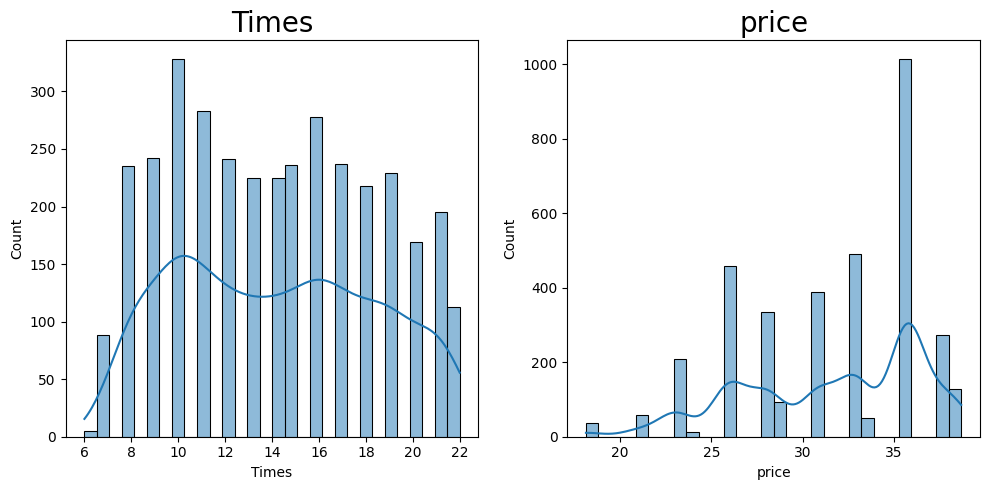

In [16]:
num_rows = (len(num_cols) + 1) // 2

f, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True, bins=30)
    ax[index].set_title(cols, size = 20)
    
plt.tight_layout()
plt.show()

### **Boxplot**

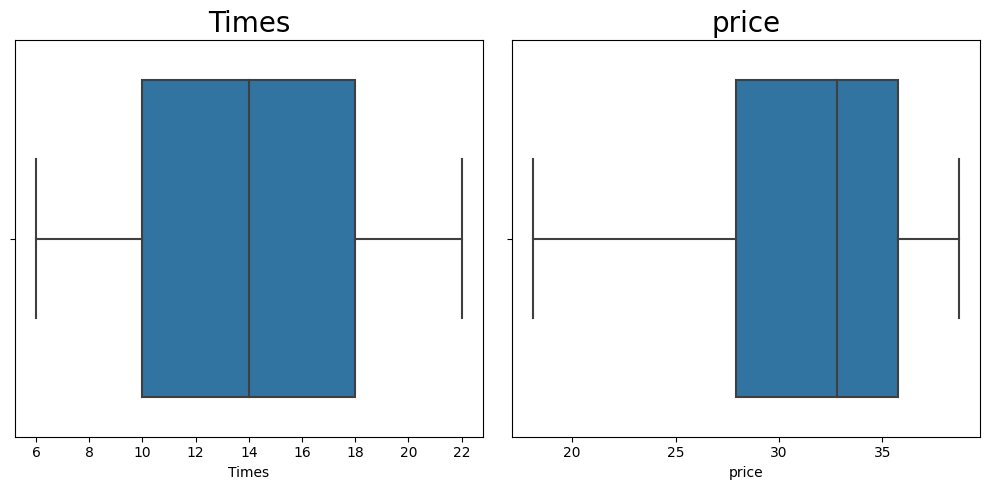

In [17]:
f, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols, size=20)
    
    
plt.tight_layout()
plt.show()

### **CountPlot**

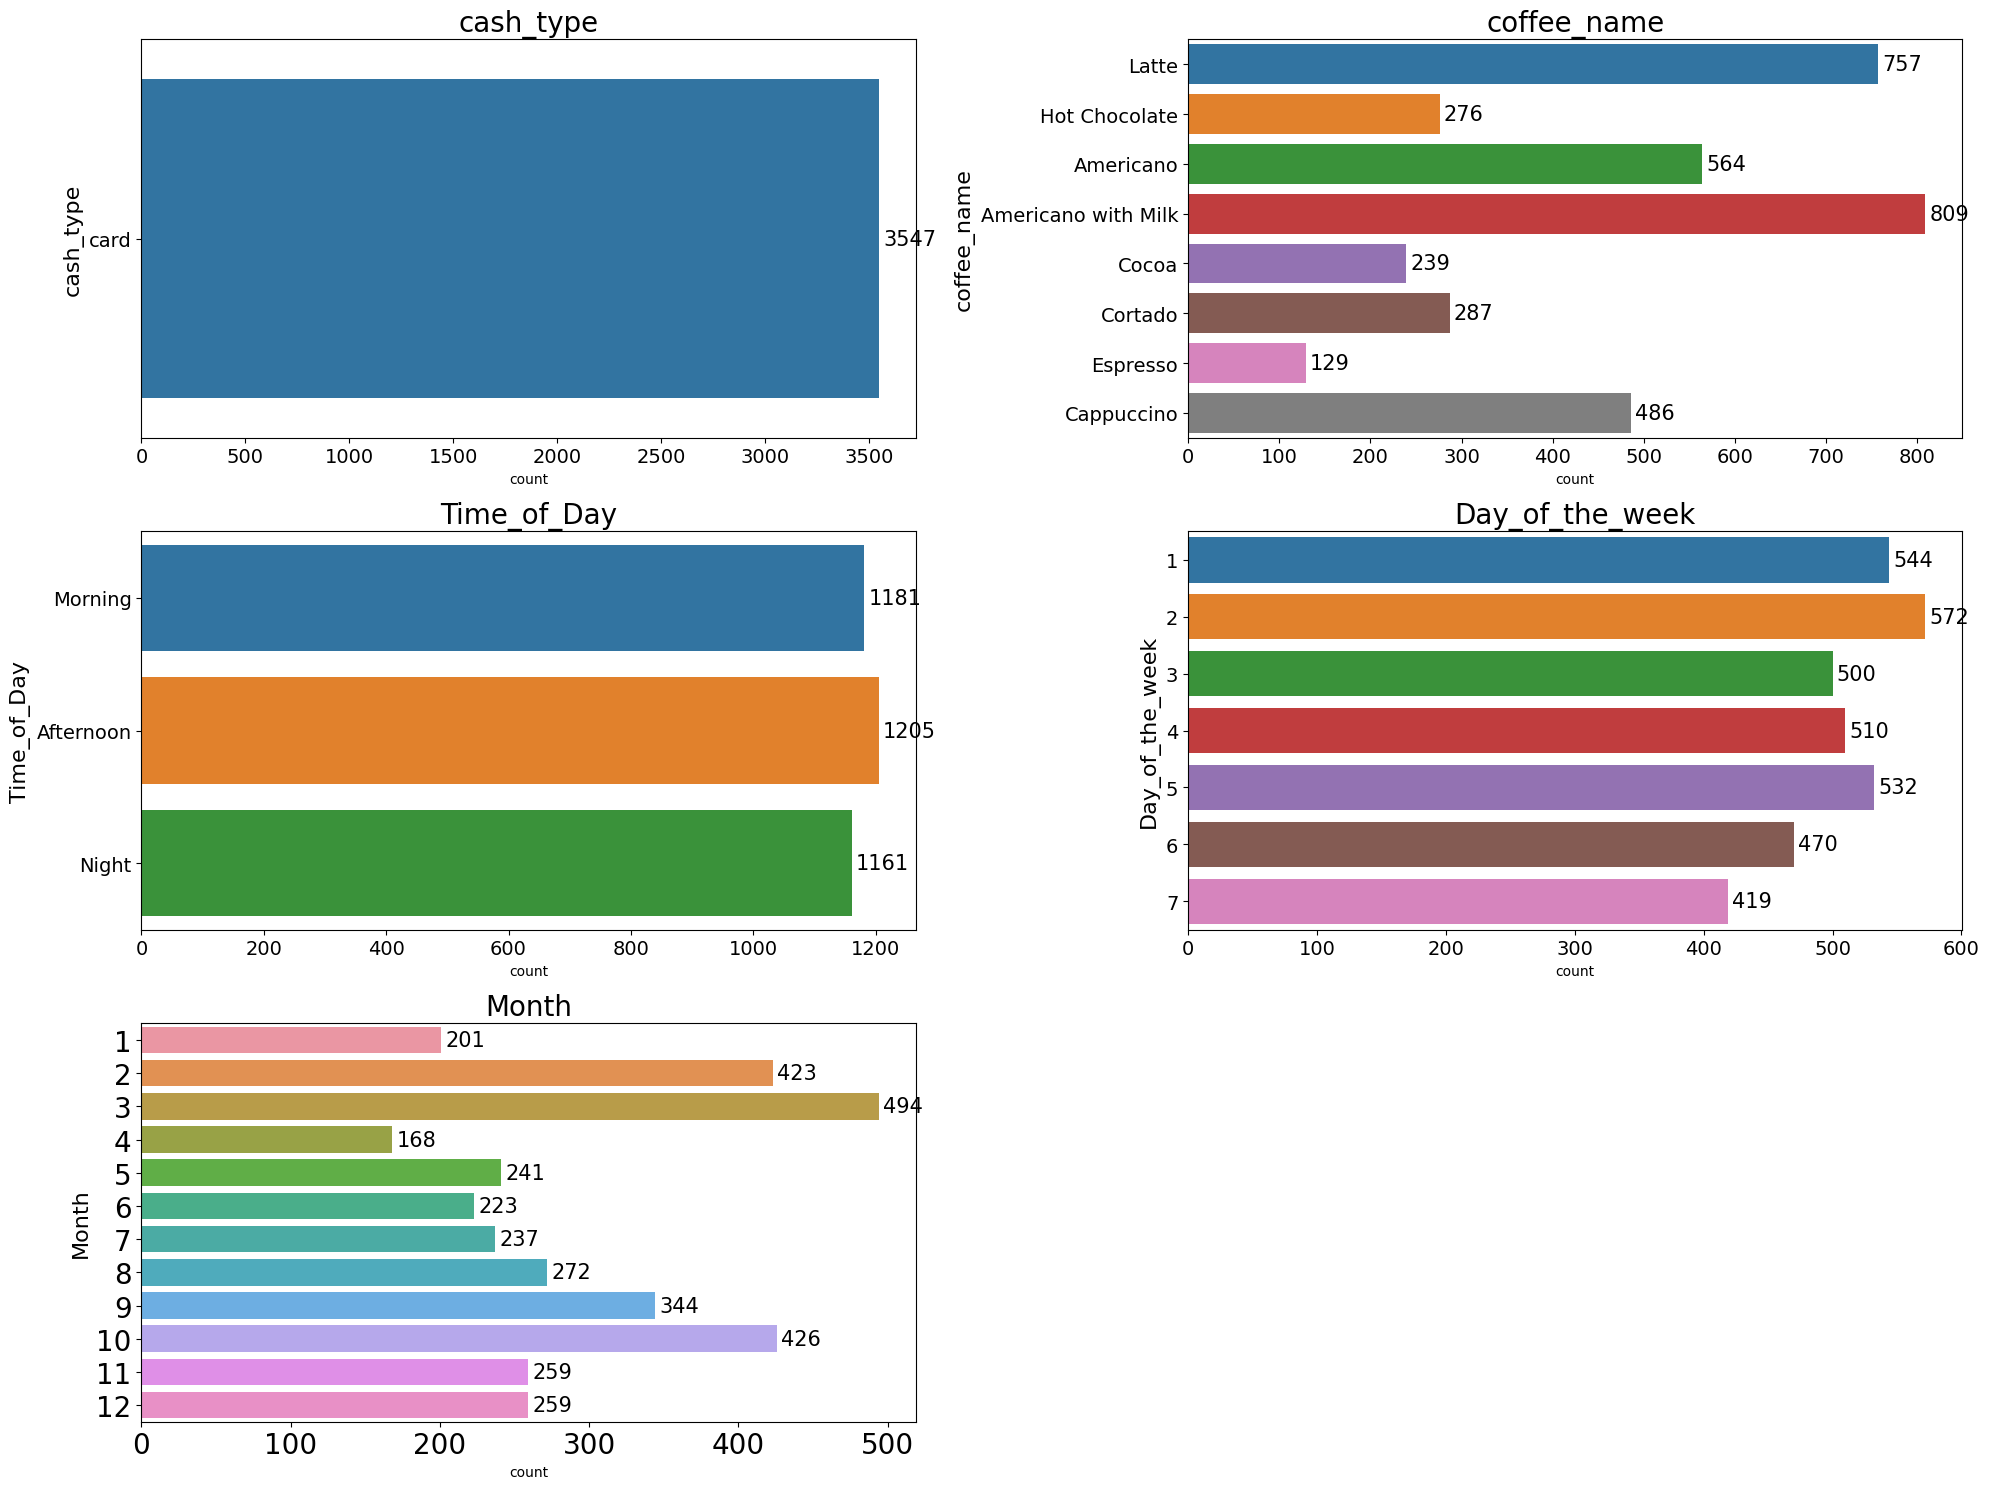

In [18]:
cat_rows = (len(cat_cols) + 1) // 2

f, ax = plt.subplots(3,2, figsize=(20,15 * num_rows))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, y = cols , ax= ax[index])
    ax[index].set_title(cols, size=20)
    ax[index].set_ylabel(cols, fontsize=16)
    ax[index].tick_params(axis='both', labelsize=14)
    
    for container in ax[index].containers:
        ax[index].bar_label(container, fontsize=15, padding=3)


for j in range(len(cat_cols), len(ax)):
    f.delaxes(ax[j])  
    
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tight_layout()
plt.show()

### **Coffee Sales Rank**

In [19]:
coffee = df.groupby(['coffee_name'])['price'].sum().astype(int).sort_values(ascending=False).reset_index()

In [20]:
coffee

,coffee_name,price
0,Latte,26875
1,Americano with Milk,24751
2,Cappuccino,17439
3,Americano,14650
4,Hot Chocolate,9933
5,Cocoa,8521
6,Cortado,7384
7,Espresso,2690


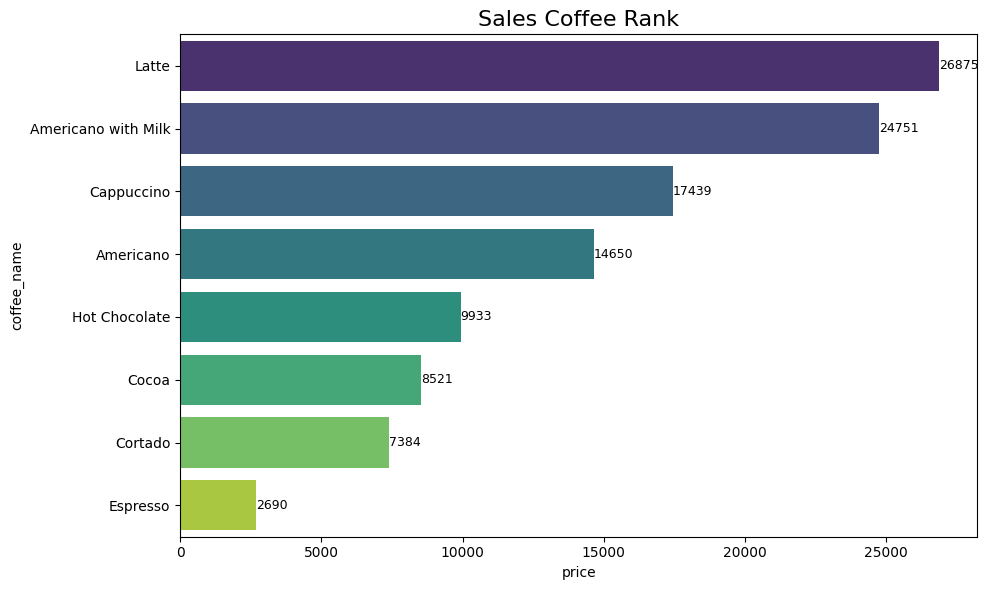

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=coffee, x='price', y='coffee_name', palette='viridis')
plt.title('Sales Coffee Rank', fontsize=16)

for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.05, y, f"{int(w)}", ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()

### **Sales Times Rank**

In [22]:
tod = df.groupby(['Time_of_Day'])['price'].sum().astype(int).sort_values(ascending=False).reset_index()

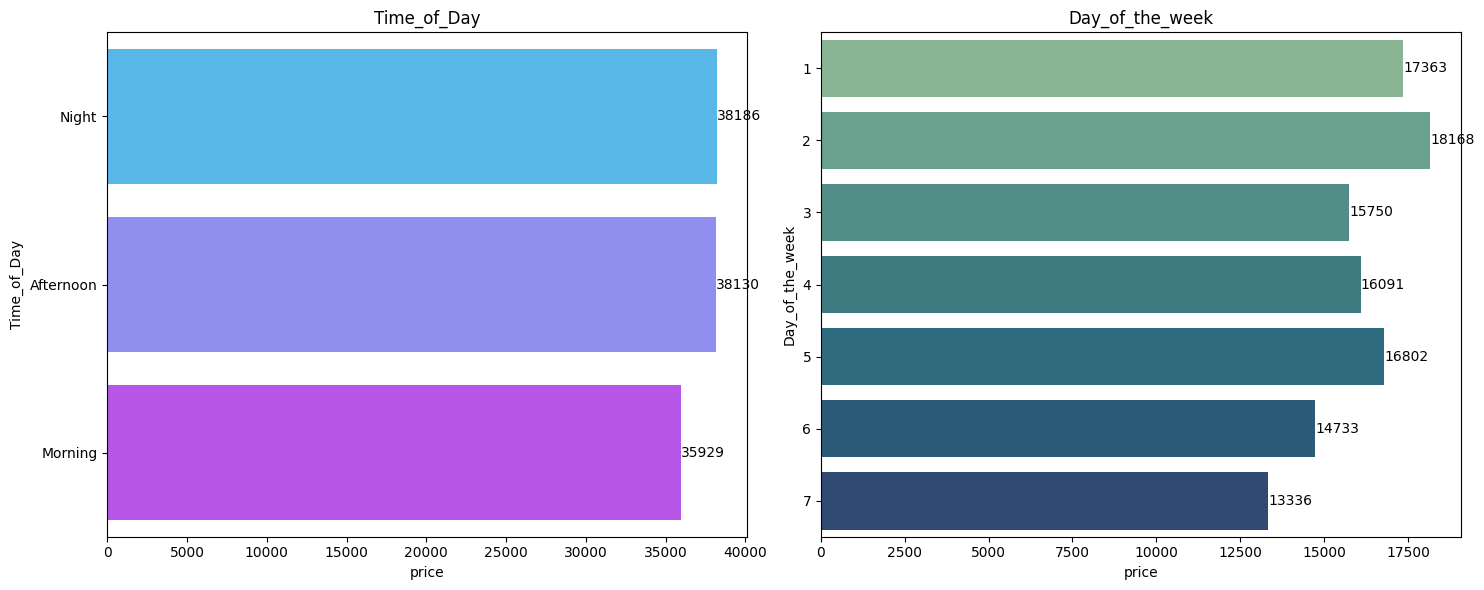

In [23]:
# left : Time_of_Day
left = df.groupby(['Time_of_Day'])['price'].sum().astype(int).sort_values(ascending=False).reset_index()

# right : Day_of_the_days
right = df.groupby(['Day_of_the_week'])['price'].sum().astype(int).sort_values(ascending=False).reset_index()
right['Day_of_the_week'] = right['Day_of_the_week'].astype('category')
fig, axes = plt.subplots(1, 2, figsize=(15,6))

ax = sns.barplot(data=left, x='price', y='Time_of_Day', palette='cool', ax=axes[0])
axes[0].set_title('Time_of_Day')
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.2, y, f'{int(w)}', va='center')

ax2 = sns.barplot(data=right, x='price', y='Day_of_the_week', palette='crest', ax=axes[1])
axes[1].set_title('Day_of_the_week')

for p in ax2.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax2.text(w+0.2, y, f'{int(w)}', va='center')

plt.tight_layout()
plt.show()

In [24]:
Month = df.groupby(['Month'])['price'].sum().astype(int).sort_values(ascending=False).reset_index()
Month['Month'] = Month['Month'].astype('category')

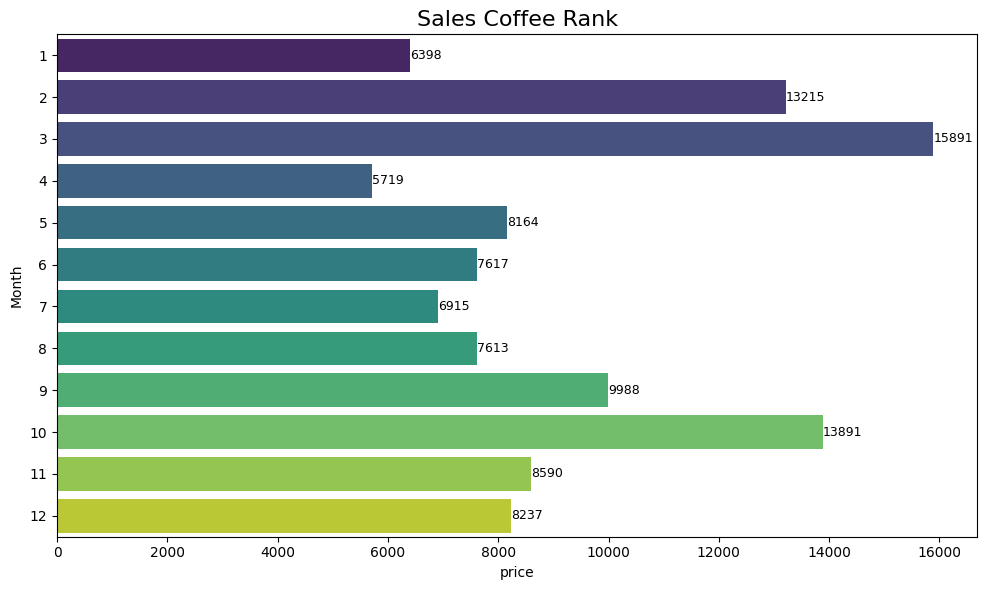

In [25]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=Month, x='price', y='Month', palette='viridis')
plt.title('Sales Coffee Rank', fontsize=16)

for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w+0.05, y, f"{int(w)}", ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()

# **Modeling & Analysis**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

### **Preprocessing**

In [27]:
X = df.drop(['price','cash_type'],axis=1)
y = df['price']

In [28]:
scaler = StandardScaler()

X['Times'] = scaler.fit_transform((X[['Times']]))

In [29]:
cat_cols = [ 'coffee_name', 'Time_of_Day', 'Day_of_the_week', 'Month'] 

In [30]:
#Label Encoding

label_encoder = LabelEncoder()
label_mappings = {}

for col in cat_cols:
    X[col] = label_encoder.fit_transform(X[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{label} -> {code}")
    print()

Column: coffee_name
Americano -> 0
Americano with Milk -> 1
Cappuccino -> 2
Cocoa -> 3
Cortado -> 4
Espresso -> 5
Hot Chocolate -> 6
Latte -> 7

Column: Time_of_Day
Afternoon -> 0
Morning -> 1
Night -> 2

Column: Day_of_the_week
1 -> 0
2 -> 1
3 -> 2
4 -> 3
5 -> 4
6 -> 5
7 -> 6

Column: Month
1 -> 0
2 -> 1
3 -> 2
4 -> 3
5 -> 4
6 -> 5
7 -> 6
8 -> 7
9 -> 8
10 -> 9
11 -> 10
12 -> 11



### **Correlation Analysis**

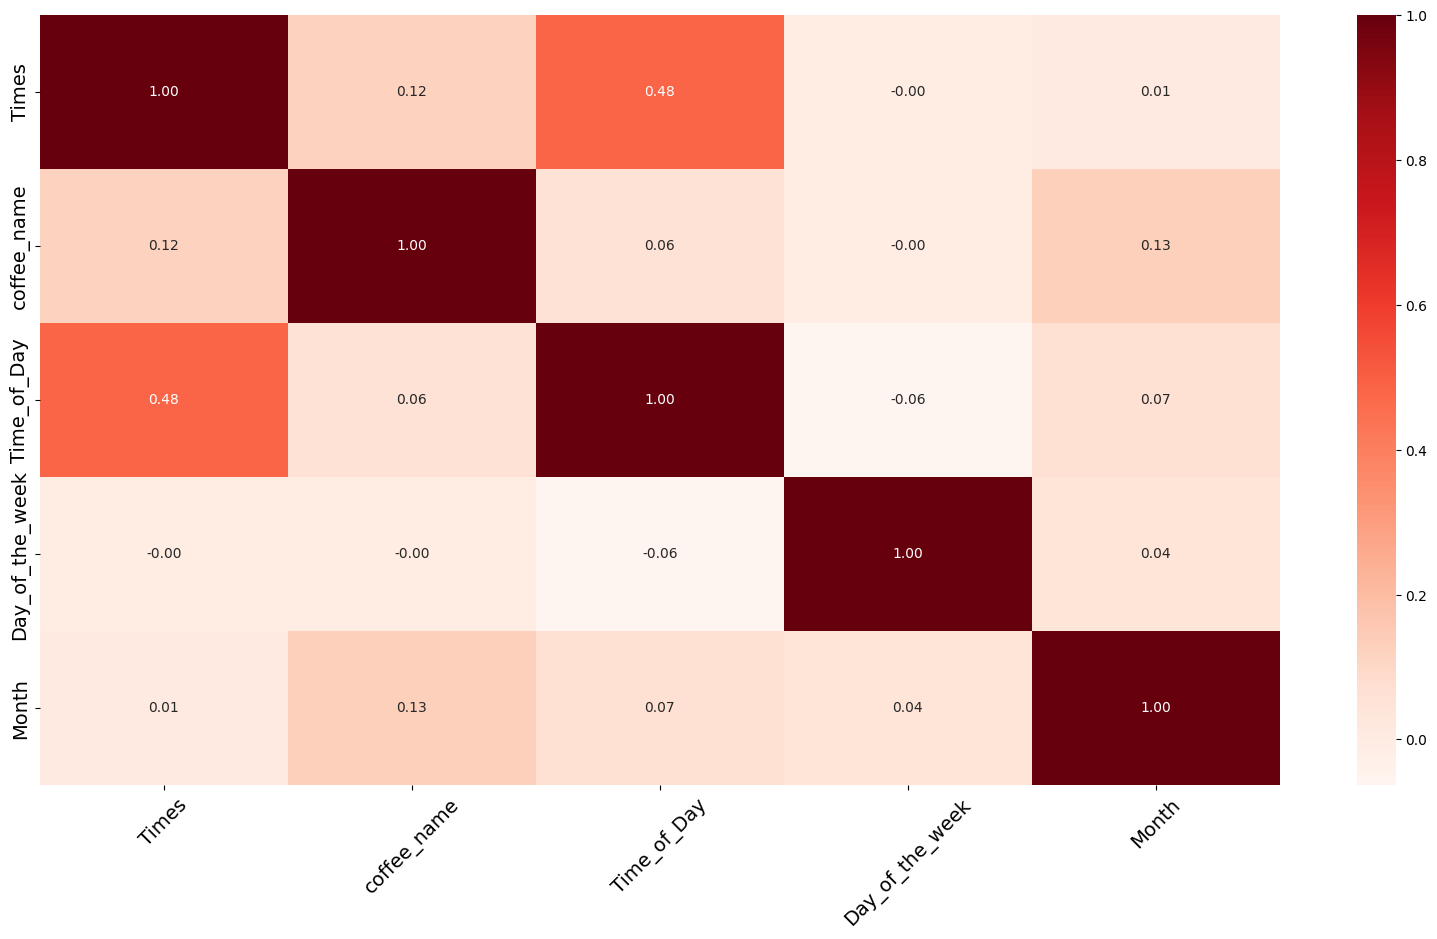

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation = 45)
plt.show()

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y , random_state = 42)

### **Modeling**

In [33]:
rfc = RandomForestRegressor(n_estimators = 300 , random_state=42)

In [34]:
rfc.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [35]:
y_pred = rfc.predict(X_test)

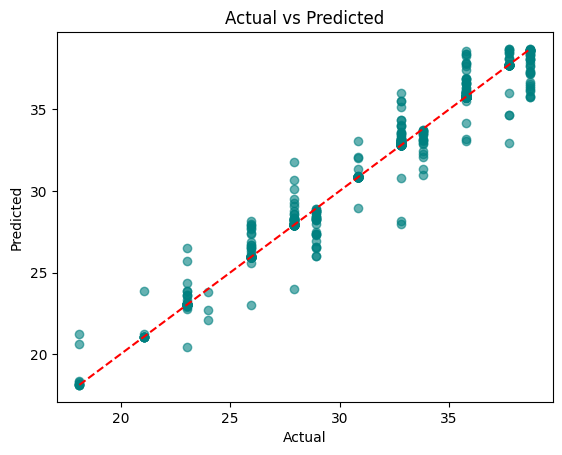

In [36]:
plt.scatter(Y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r')
plt.show()

### **Feature Importance**

           Feature  Importance
1      coffee_name    0.872152
4            Month    0.111378
0            Times    0.008666
3  Day_of_the_week    0.006338
2      Time_of_Day    0.001468


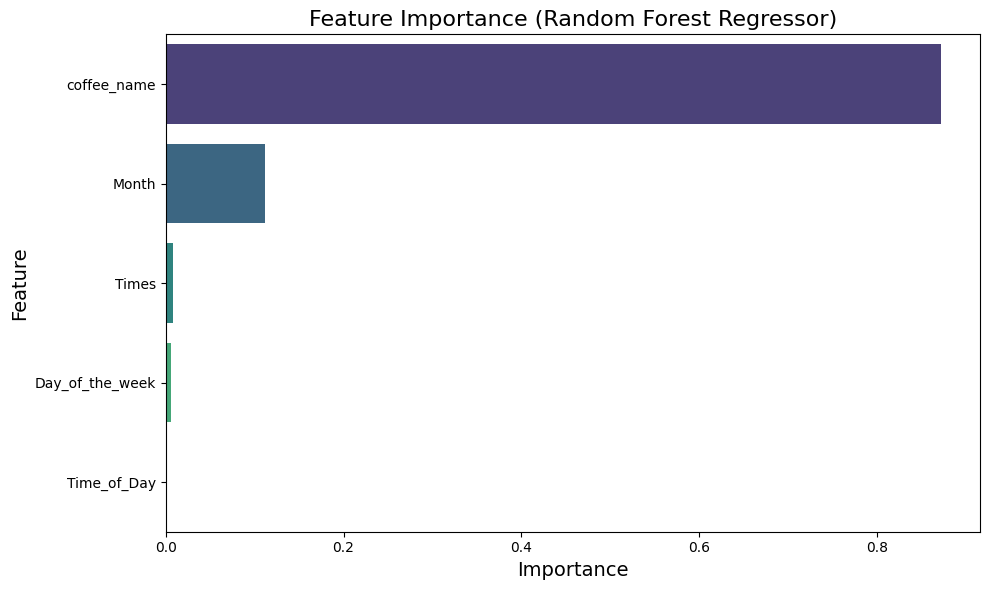

In [37]:
importances = rfc.feature_importances_
features = X.columns


fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(fi_df)


plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest Regressor)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


**The model indicates that coffee type and month are the main factors determining the sales amount.Although the model shows an RMSE of 0.7, suggesting relatively low precision and high variability,it is expected that the overall order of feature importance would remain largely consistenteven if a more sophisticated model were applied.**


------------

**Thankyou. Please leave your advice in the comments**